# https://github.com/HoangDucTrong19146285/CNN_money.git

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)


training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/data_11loaitiengiayVietNam/train_data',
                        target_size=(150, 150),
                        batch_size=30,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/data_11loaitiengiayVietNam/test_data",
                         target_size=(150, 150),
                          batch_size=30,   
                         class_mode="categorical")


Found 981 images belonging to 11 classes.
Found 215 images belonging to 11 classes.


In [4]:
training_generator.class_indices

{'100k_vnd': 0,
 '10k_vnd': 1,
 '1k_vnd': 2,
 '200_vnd': 3,
 '200k_vnd': 4,
 '20k_vnd': 5,
 '2k_vnd': 6,
 '500_vnd': 7,
 '500k_vnd': 8,
 '50k_vnd': 9,
 '5k_vnd': 10}

In [5]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

##model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(64,activation='relu',name='fc1'))

model.add(Dense(32,activation='relu',name='fc2'))

model.add(Dense(11,activation='softmax'))

In [6]:
model.summary()
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
history = model.fit(training_generator,batch_size=50,epochs=40,verbose=1,validation_data=validation_generator)

Epoch 1/40
33/33 [==============================] - 367s 11s/step - loss: 2.8343 - accuracy: 0.1101 - val_loss: 2.3865 - val_accuracy: 0.1023
Epoch 2/40
33/33 [==============================] - 56s 2s/step - loss: 2.3382 - accuracy: 0.1254 - val_loss: 2.3753 - val_accuracy: 0.1256
Epoch 3/40
33/33 [==============================] - 55s 2s/step - loss: 2.3262 - accuracy: 0.1325 - val_loss: 2.3701 - val_accuracy: 0.1116
Epoch 4/40
33/33 [==============================] - 55s 2s/step - loss: 2.3058 - accuracy: 0.1315 - val_loss: 2.3449 - val_accuracy: 0.1116
Epoch 5/40
33/33 [==============================] - 55s 2s/step - loss: 2.2889 - accuracy: 0.1407 - val_loss: 2.3640 - val_accuracy: 0.1302
Epoch 6/40
33/33 [==============================] - 55s 2s/step - loss: 2.2329 - accuracy: 0.1957 - val_loss: 2.4102 - val_accuracy: 0.1302
Epoch 7/40
33/33 [==============================] - 55s 2s/step - loss: 2.2368 - accuracy: 0.1845 - val_loss: 2.3167 - val_accuracy: 0.2000
Epoch 8/40
33/33 [

In [11]:
model.save('/content/drive/MyDrive/CNN_Money.h5')
from keras.models import load_model
model=load_model('/content/drive/MyDrive/CNN_Money.h5')


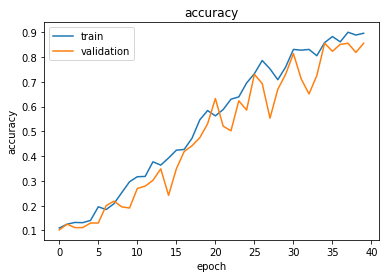

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

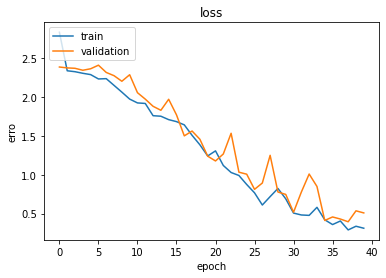

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('erro')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [13]:
training_generator.class_indices

{'100k_vnd': 0,
 '10k_vnd': 1,
 '1k_vnd': 2,
 '200_vnd': 3,
 '200k_vnd': 4,
 '20k_vnd': 5,
 '2k_vnd': 6,
 '500_vnd': 7,
 '500k_vnd': 8,
 '50k_vnd': 9,
 '5k_vnd': 10}

In [14]:
names= ['100k_vnd','10k_vnd','1k_vnd','200_vnd','200k_vnd','20k_vnd','2k_vnd','500_vnd','500k_vnd','50k_vnd','5k_vnd']

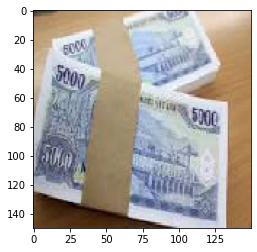

In [17]:
from keras.preprocessing.image import load_img
img=load_img('5k_rach.jpg',target_size=(150,150,3))
plt.imshow(img)

In [18]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
import numpy as np
#np.argmax(model.predict(img),axis=1)   #vi tri so 46
print(names[np.argmax(model.predict(img))])

5k_vnd


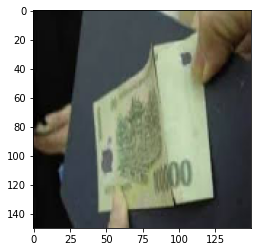

In [19]:
from keras.preprocessing.image import load_img
img=load_img('100krach.jpg',target_size=(150,150,3))
plt.imshow(img)

In [20]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
import numpy as np
#np.argmax(model.predict(img),axis=1)   #vi tri so 46
print(names[np.argmax(model.predict(img))])

100k_vnd


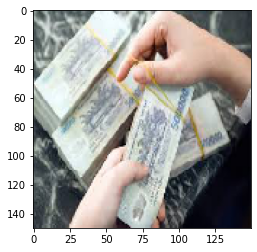

In [22]:
from keras.preprocessing.image import load_img
img=load_img('500k.jpg',target_size=(150,150,3))
plt.imshow(img)

In [23]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
import numpy as np
#np.argmax(model.predict(img),axis=1)   #vi tri so 46
print(names[np.argmax(model.predict(img))])

500k_vnd


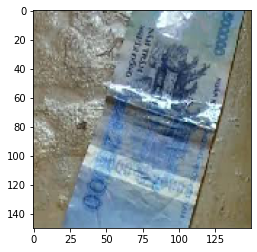

In [24]:
from keras.preprocessing.image import load_img
img=load_img('20k.jpg',target_size=(150,150,3))
plt.imshow(img)

In [25]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
import numpy as np
#np.argmax(model.predict(img),axis=1)   #vi tri so 46
print(names[np.argmax(model.predict(img))])

20k_vnd
